<a href="https://colab.research.google.com/github/AgungA1/Agung-Malik-Qindy_2141720114_PCVK/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 5:**

* Agung Malik Al Qindy / 2141720114

* Billie Faiqul Izzat / 214172020051

* Shovinas Hanun / 2141720252

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# **Object Detection**
Metode yang digunakan:


1.   Template Matching
2.   Edge Detection
3.   Corner Detection
4.   Grid Detection
5.   Contour Detection


## **Template Matching**


### 2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

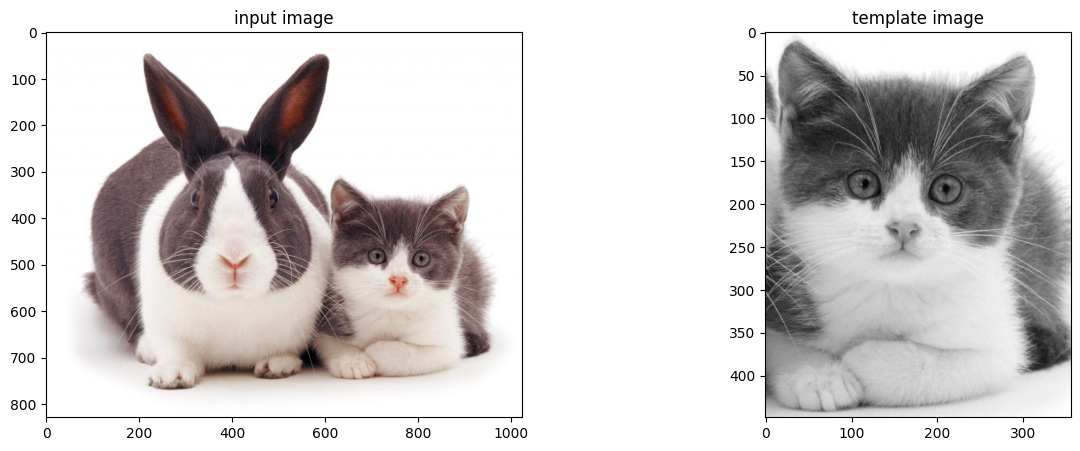

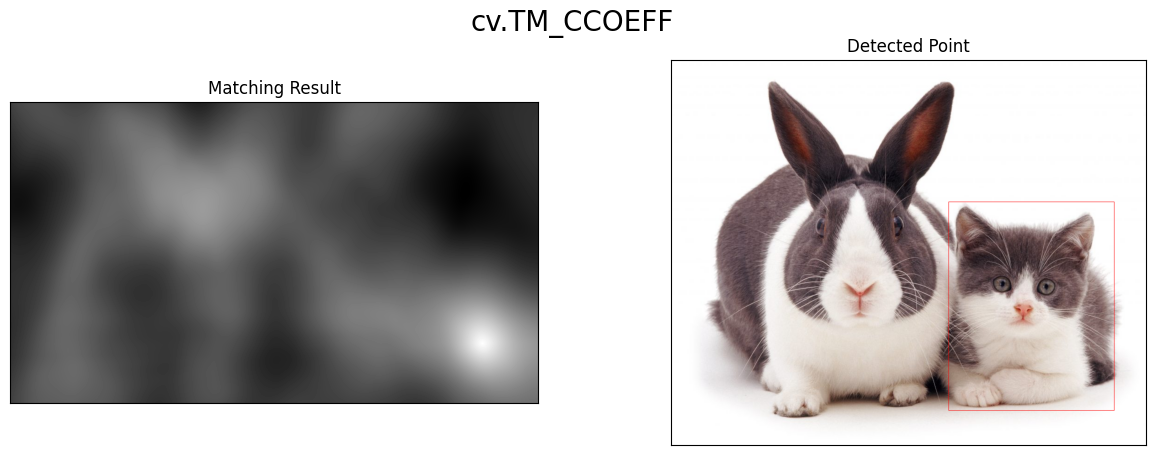

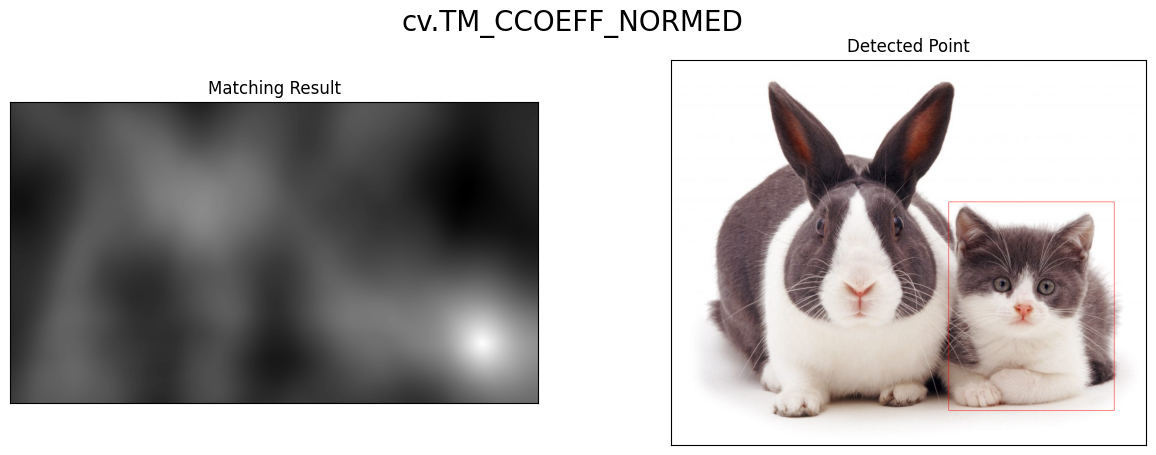

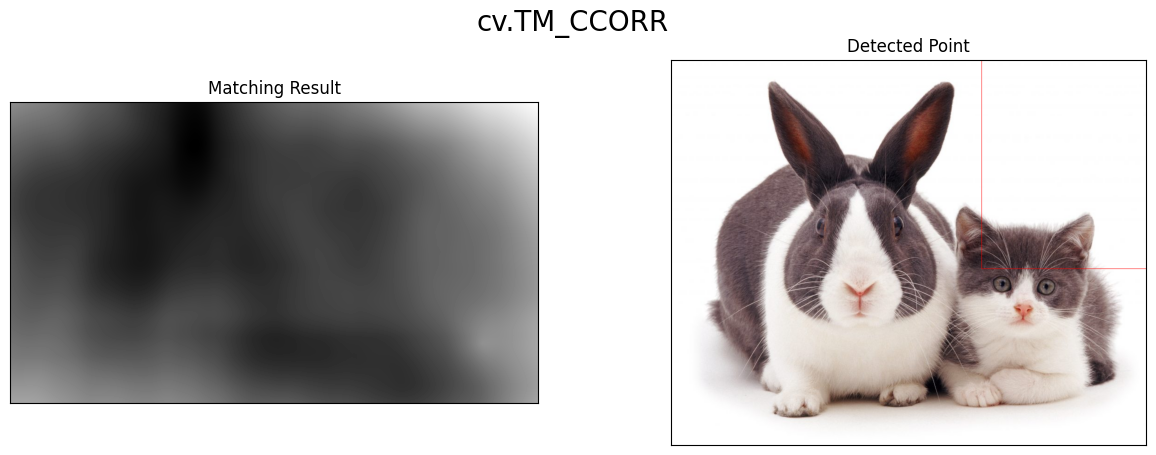

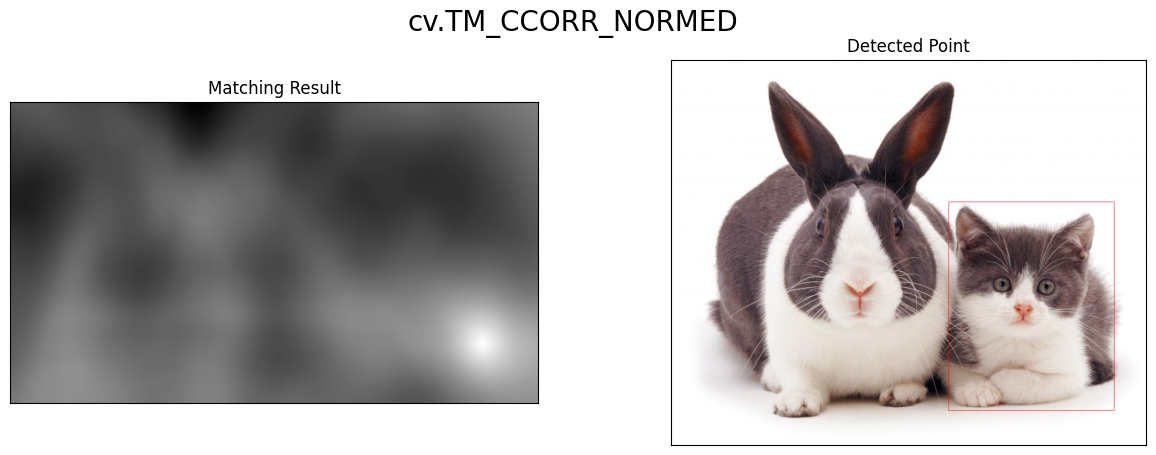

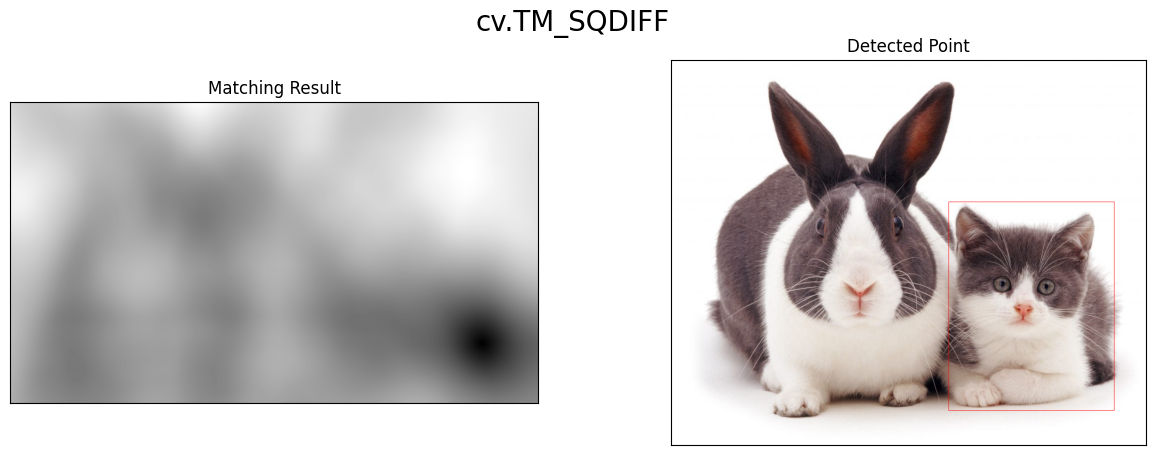

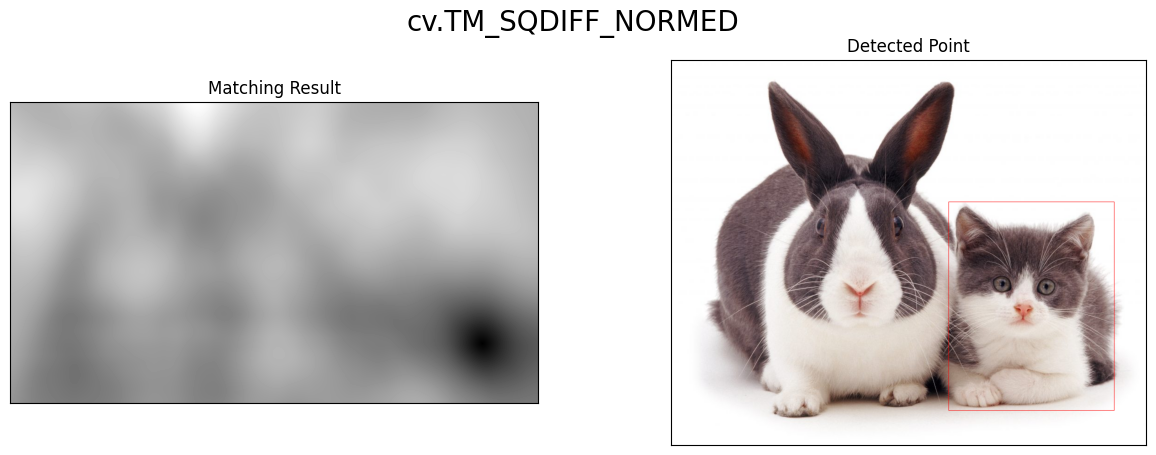

In [4]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

### 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

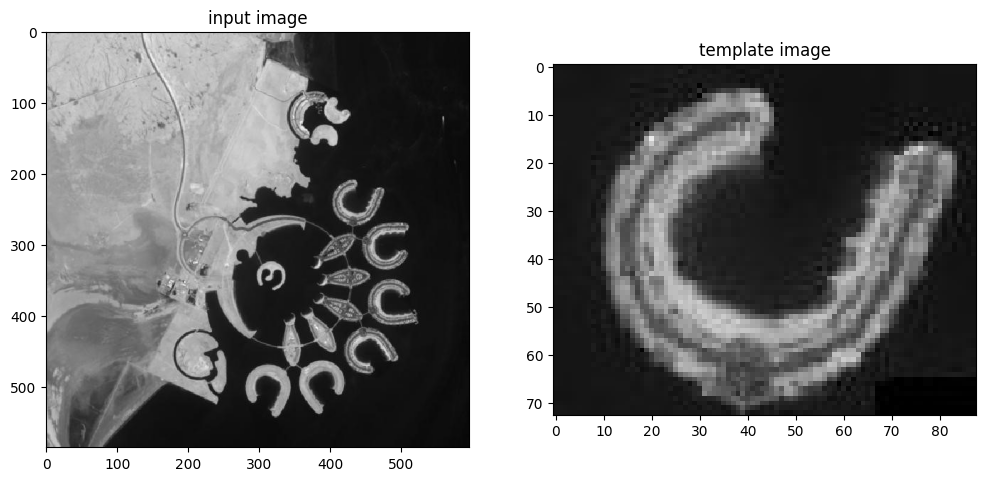

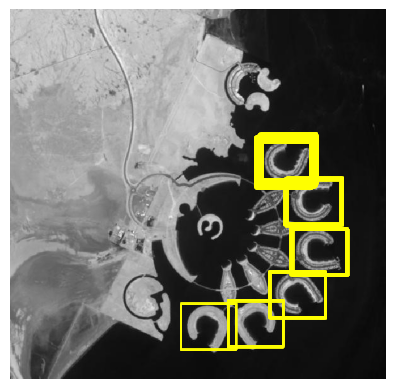

In [50]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.5)
    ax.add_patch(rect)
plt.show()

## **Edge Detection**

### 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

a. Sobel Edge Detection


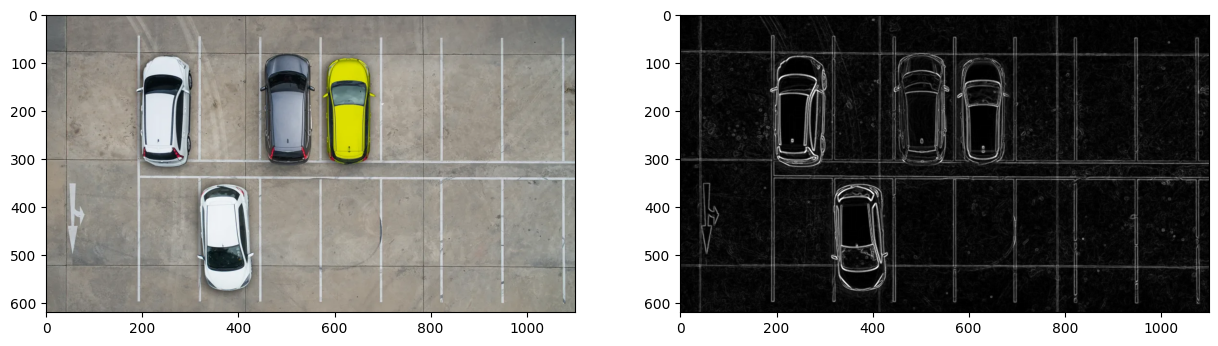

In [43]:
# a. Sobel Edge Detection

img0 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/car-park.jpg')

# converting to gray scale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# remove noise
img = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

print("a. Sobel Edge Detection")
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(img_sobelxy, cv.COLOR_BGR2RGB))

 b. Canny Edge Detection


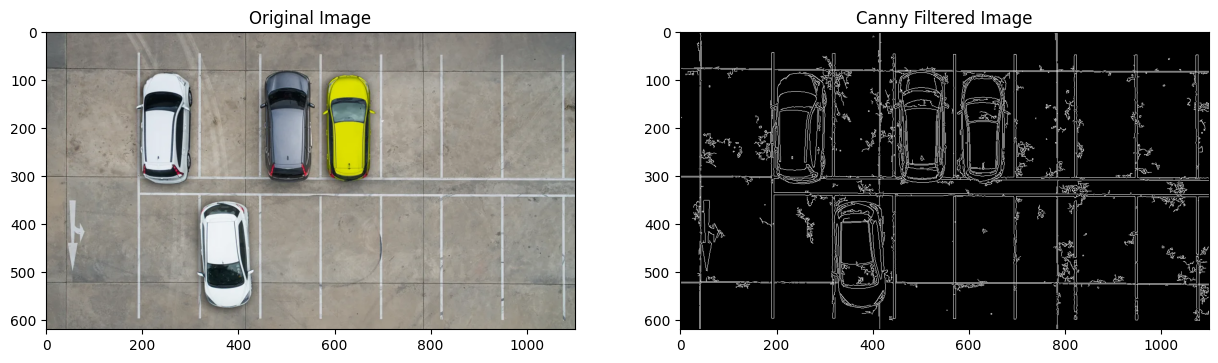

In [75]:
# b. Canny Edge Detection
# remove noise
image_gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
filtered_image = cv.Canny(image_gray, threshold1=20, threshold2=200)
# Plot outputs
print(" b. Canny Edge Detection")
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
ax2.title.set_text('Canny Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

 c.  Laplacian Edge Detection


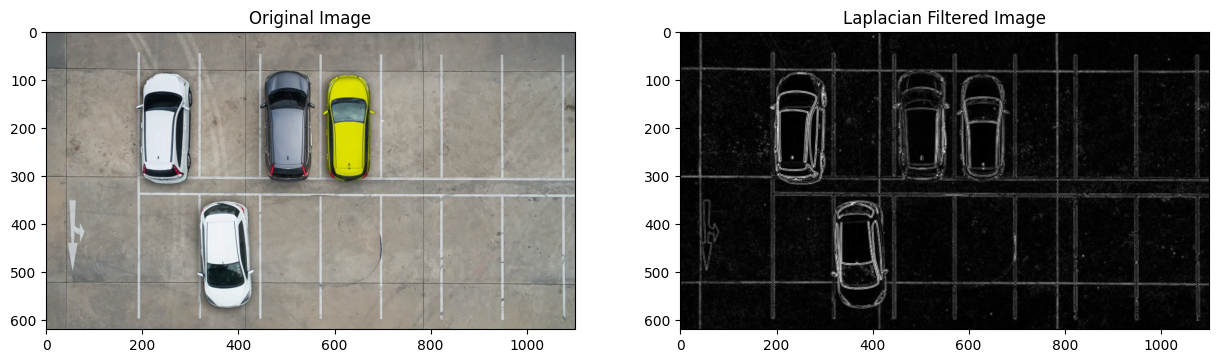

In [56]:
# c.  Laplacian Edge Detection
# remove noise
image_gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
# Reduce noise in image
img = cv.GaussianBlur(image_gray,(3,3),0)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)
# Plot outputs
print(" c.  Laplacian Edge Detection")
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

## **Corner Detection**

### 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

a. Harris Corner Detection


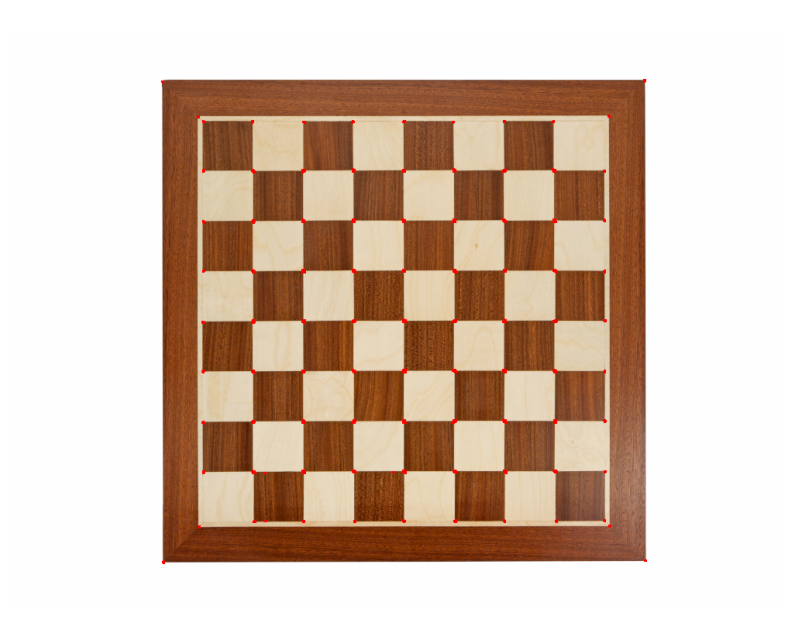

In [60]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/chess-board.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Mendeteksi sudut menggunakan metode deteksi sudut Harris
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# Memperluas sudut yang terdeteksi untuk membuatnya lebih terlihat
dst = cv.dilate(dst, None)

# Menandai sudut yang terdeteksi dengan warna merah (format BGR)
image[dst > 0.01 * dst.max()] = [0, 0, 255]
# Pemberian ambang batas (threshold) pada nilai respons Harris dan penandaan sudut dengan warna merah

print("a. Harris Corner Detection")
# Menampilkan gambar dengan sudut yang terdeteksi
plt.figure(figsize=[10, 10])
plt.axis('off')
plt.imshow(image[:, :, ::-1])  # Mengonversi BGR menjadi RGB untuk ditampilkan

# Menampilkan gambar dengan sudut yang ditandai
plt.show()

b. Shi-Tomasi Detection


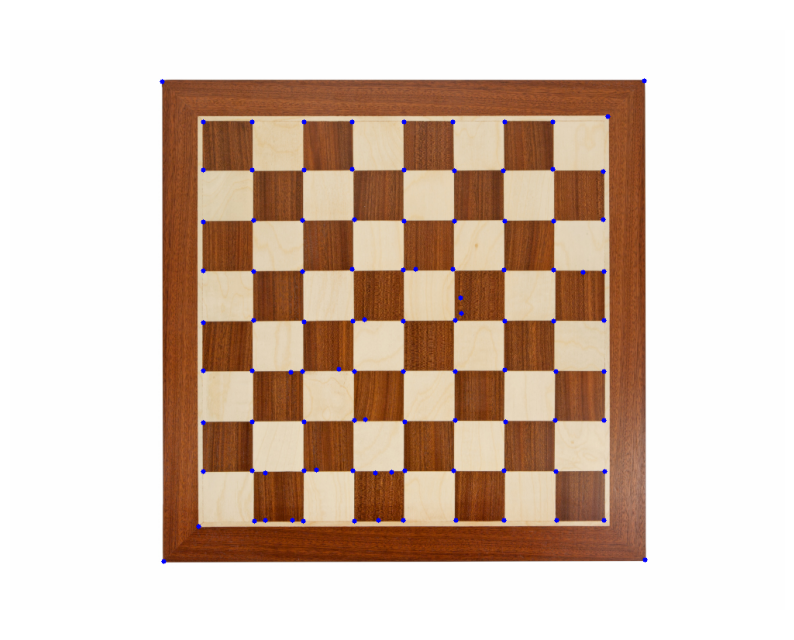

In [67]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/chess-board.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

corners_img = cv.goodFeaturesToTrack(gray,100,0.01,10)
corners_img = np.int0(corners_img)

for corners in corners_img:
  x,y = corners.ravel()

  cv.circle(image,(x,y),3,[255,0,0],-1)

print("b. Shi-Tomasi Detection")

plt.figure(figsize=[10, 10])
plt.axis('off')
plt.imshow(image[:, :, ::-1])

plt.show()

## **Grid Detection**

### 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

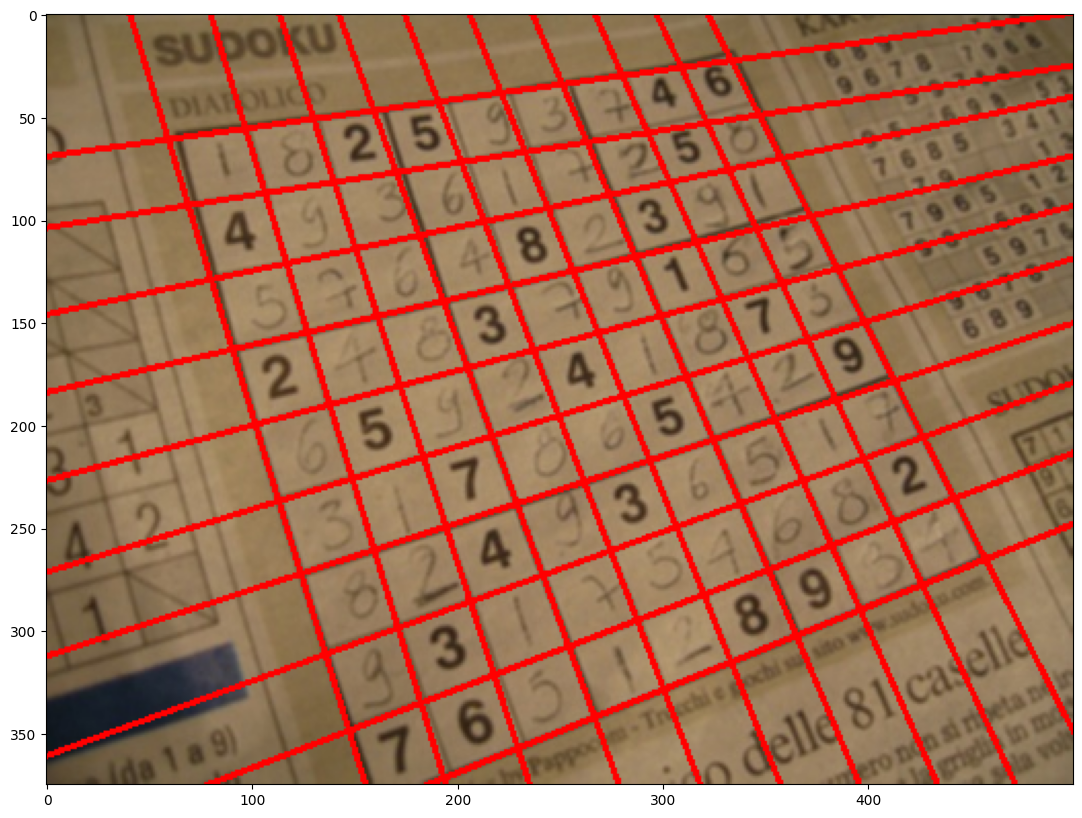

In [92]:
input_img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))


## **Countur Detection**

### 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

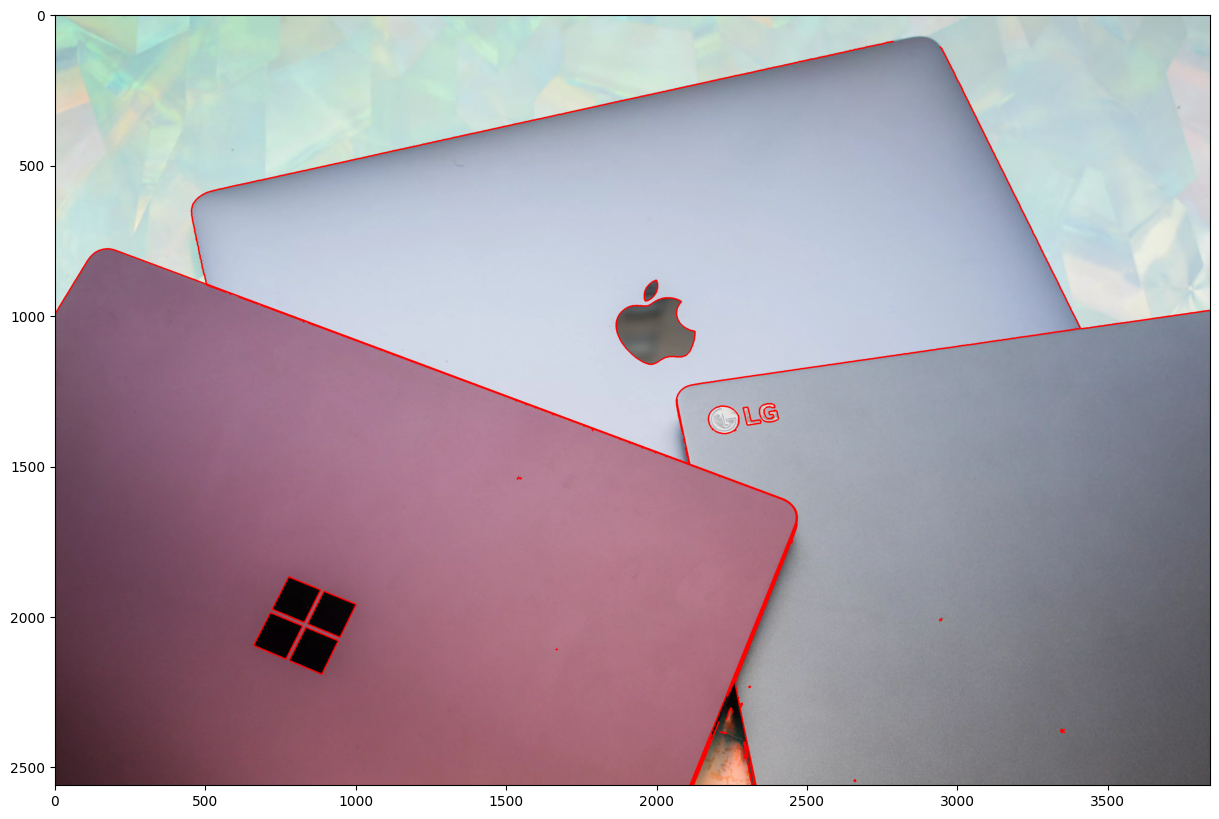

In [93]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 11/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### **Tugas Praktikum**

Kelompok 5 – KTP Widiarso Bekasi

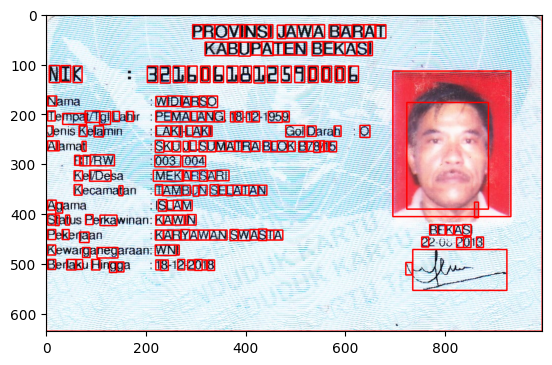

In [133]:
ktp = cv.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/Pertemuan 7/KTP_More/ktp6.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)


# cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()